# Project Title - Datascience jobs salaries

### Introduction
In this project, I will examine a dataset on the pay for several data science professions that I downloaded from Kaggle. Using this dataset, I'll provide answers to a number of questions, including: Does a person's work role have an impact on their salary? Does the sort of employment affect the wage earned? Does the size and location of the company have an impact on the salary paid? 
To answer these questions, I'll be utilizing Python libraries such as Numpy and Pandas for computations, and Matplotlib and Seaborn for visualizations.
A lot of what I'll be doing derives its inspiration from the course offered by Jovian; Data Ananlysis: Zerotopandas.


## Downloading the Dataset

**TODO** - I'll be using a dataset obtained from Kaggle on the Data science jobs salaries.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries'

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: moseskinuthia
Your Kaggle Key: ········


100%|██████████| 7.37k/7.37k [00:00<00:00, 6.25MB/s]

The dataset has been downloaded and extracted.

In [4]:
# Change this
data_dir = './data-science-job-salaries'

In [5]:
import os
os.listdir(data_dir)

['ds_salaries.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "datascience-jobs-salaries"

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "moseskinuthia73/datascience-jobs-salaries" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/moseskinuthia73/datascience-jobs-salaries


'https://jovian.ai/moseskinuthia73/datascience-jobs-salaries'

## Data Preparation and Cleaning

**TODO**
In this step, I'll be preparing the dataset for analysis by removing any null values and duplicate values and reorganizing the dataset in a way that will make the analysis's findings informative.



In [10]:
import pandas as pd
import numpy as np
import os

In [11]:
salary_df = pd.read_csv('./data-science-job-salaries/ds_salaries.csv')

In [12]:
salary_df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [13]:
salary_df.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [14]:
salary_df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [15]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [16]:
salary_df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [17]:
import jovian

In [18]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "moseskinuthia73/datascience-jobs-salaries" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/moseskinuthia73/datascience-jobs-salaries


'https://jovian.ai/moseskinuthia73/datascience-jobs-salaries'

## Exploratory Analysis and Visualization


An exploratory analysis is a thorough examination meant to uncover the underlying structure of a data set and is important because it exposes trends, patterns, and relationships that are not readily apparent.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [19]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

<AxesSubplot:>

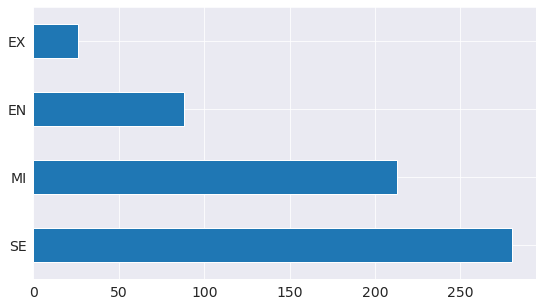

In [20]:
# The level of experience of each job holder.
salary_df.experience_level.value_counts().plot.barh()

From the above graph, we can see that the senior level of experience has the highest number of job holders, followed by the middle level, entry level, and the executive level.

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

<AxesSubplot:>

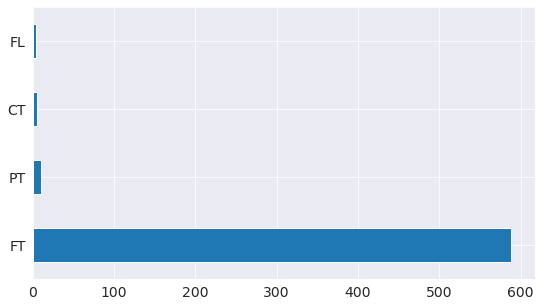

In [21]:
# The number of job holders per the type of employment
salary_df.employment_type.value_counts().plot.barh()

From the above graph, it can be seen that most of the job holders are employed on a full time basis.

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

<AxesSubplot:>

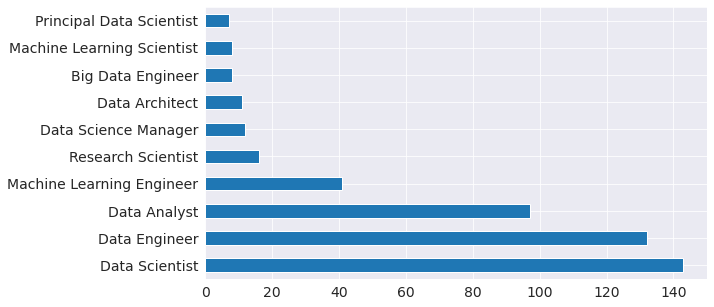

In [22]:
# The number of job holders per the job title
salary_df.job_title.value_counts().head(10).plot.barh()

Due to the large number of job roles inherent in our dataset, I've decided to use a sample of 10, starting with the job role having the highest number of employees.
From the above diagram, it can be seen that a large number of employees in our dataset are data scientist, followed by data engineers, data analysts, machine learning engineers, research scientists, data science managers, data architects, big data engineers, machine learning scientists, and principal data scientists.

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

(array([149., 228., 149.,  61.,  10.,   2.,   4.,   3.,   0.,   1.]),
 array([  2859. ,  62573.1, 122287.2, 182001.3, 241715.4, 301429.5,
        361143.6, 420857.7, 480571.8, 540285.9, 600000. ]),
 <BarContainer object of 10 artists>)

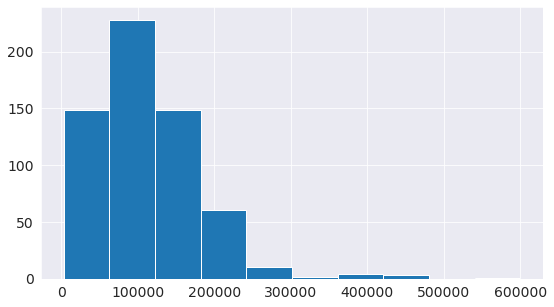

In [23]:
# The distribution of the salary_in_usd
plt.hist(salary_df.salary_in_usd)

From the above diagram, it can be seen that a huge number of employees' salary range from 50,000 to 100,000. We also have outliers, as one of the employees is receiving a salary of 600,000 usd.

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

<AxesSubplot:>

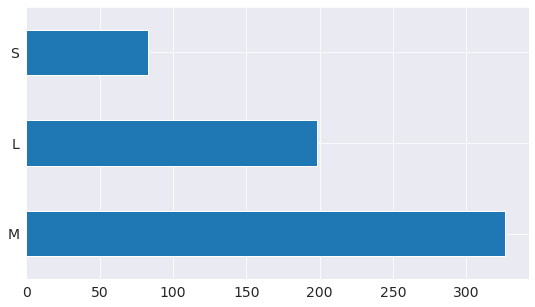

In [24]:
# The number of job holders per the company size
salary_df.company_size.value_counts().plot.barh()

From the above graph, it can be seen that a huge number of employees are employed in medium sized companies, followed by large sized companies, and small sized companies.

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

<AxesSubplot:title={'center':'salary_in_usd'}, xlabel='experience_level'>

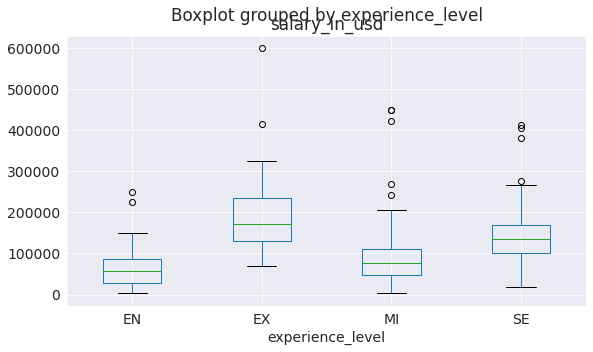

In [25]:
# we will now determine the relationship between the level of experience of the job holder and the salary (in usd)
salary_df.boxplot(column='salary_in_usd', by='experience_level')

From the above diagram, it can be seen that there is a correlation between the job holders' level of experience and the amount of salary (in usd) received. The job holders at the executive level receive the highest salary, followed by the ones at the senior level, middle level, and the entry level.

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

<AxesSubplot:xlabel='experience_level,company_size'>

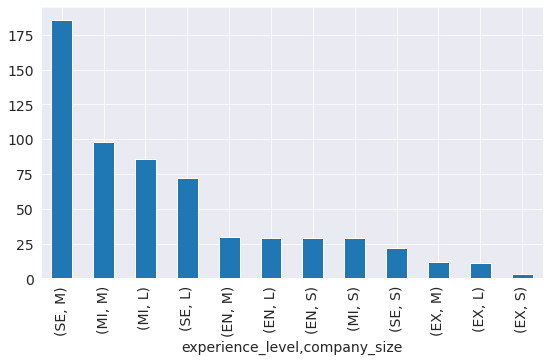

In [26]:
# we will now determine the relationship between the level of experience and the size of the company.
combined = salary_df[['experience_level', 'company_size']]
combined.value_counts().plot.bar()

From the above graph, it can be seen that most of the job holders at the senior level are employed in medium sized companies.
The number of job holders at the executive level is low for both the large, medium, and small sized companies.

Let us save and upload our work to Jovian before continuing

In [27]:
import jovian

In [28]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "moseskinuthia73/datascience-jobs-salaries" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/moseskinuthia73/datascience-jobs-salaries


'https://jovian.ai/moseskinuthia73/datascience-jobs-salaries'

## Asking and Answering Questions

In this section, I will be answering various questions regarding our dataset.
#### The importance of asking good questions cannot be over-emphasized, as good questions highlight insights in our dataset that could act as the basis of many decisions regarding employment in the future.


In [29]:
#pd.set_option('display.max_rows', None)

#### Q1: TODO - Is there a relationship between the level of experience of the job holder and the amount of salary received?

In [30]:
salary_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [31]:
experience=salary_df[['experience_level', 'salary_in_usd']]
experience.sort_values(by=['salary_in_usd'], ascending=False)

,experience_level,salary_in_usd
252,EX,600000
97,MI,450000
33,MI,450000
157,MI,423000
225,EX,416000
...,...,...
179,MI,5679
77,MI,5409
238,EN,4000
185,MI,4000


<AxesSubplot:title={'center':'salary_in_usd'}, xlabel='experience_level'>

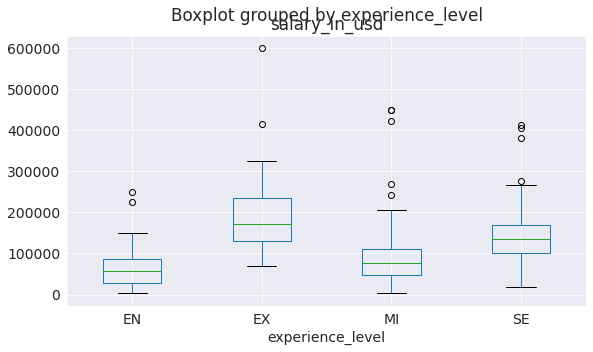

In [32]:
salary_df.boxplot(column='salary_in_usd', by='experience_level')

It is evident that there is a relationship between the level of experience and the salary (in usd), as job holders at the more senior and executive levels tend to receive the highest amount of salary.

#### Q2: TODO - Is there a relationship between the type of employment and the amount of salary received by the job holder?

In [33]:
type=salary_df[['employment_type', 'salary_in_usd']]
type.sort_values(by=['salary_in_usd'], ascending=False)
salary_df.employment_type.value_counts()

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

<AxesSubplot:title={'center':'salary_in_usd'}, xlabel='employment_type'>

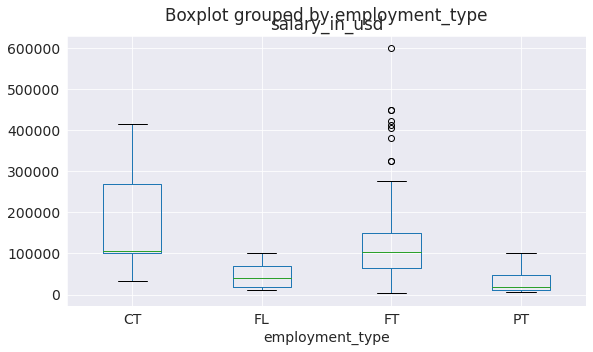

In [34]:
salary_df.boxplot(column='salary_in_usd', by='employment_type')

From the above diagram, we can see that there is a correlation between the type of employment and the amount of salary received. A significant number of job holders under the full mode of employment receive large sums of money. The exception is that a few individuals under the contract mode of employment also receive huge sums of money.

#### Q3: TODO - Is there a relationship between the role of the job holder and the amount of salary received?

In [35]:
title=salary_df[['job_title', 'salary_in_usd']]
title.sort_values(by=['salary_in_usd'], ascending=False)

,job_title,salary_in_usd
252,Principal Data Engineer,600000
97,Financial Data Analyst,450000
33,Research Scientist,450000
157,Applied Machine Learning Scientist,423000
225,Principal Data Scientist,416000
...,...,...
179,Data Scientist,5679
77,3D Computer Vision Researcher,5409
238,Data Scientist,4000
185,Data Engineer,4000


From our analysis, it is evident that the amount of salary received is proportional to the seniority of the job position held.

#### Q4: TODO - Is there a relationship between the company location and the amount of salary received? (regardless of the job role)

In [36]:
location=salary_df[['company_location', 'salary_in_usd']]
location.sort_values(by=['salary_in_usd'], ascending=False)

,company_location,salary_in_usd
252,US,600000
97,US,450000
33,US,450000
157,US,423000
225,US,416000
...,...,...
179,US,5679
77,IN,5409
238,VN,4000
185,IR,4000


The majority of the companies in our dataset are based in the United States. Compared to those outside of the US, the majority of these pay their staff enormous sums of money.

#### Q5: TODO - Is there a relationship between the size of the company and the amount of salary received? (regardless of the job role)

In [37]:
size=salary_df[['company_size', 'salary_in_usd']]
size.sort_values(by=['salary_in_usd'], ascending=False)

,company_size,salary_in_usd
252,L,600000
97,L,450000
33,M,450000
157,L,423000
225,S,416000
...,...,...
179,S,5679
77,M,5409
238,M,4000
185,M,4000


<AxesSubplot:title={'center':'salary_in_usd'}, xlabel='company_size'>

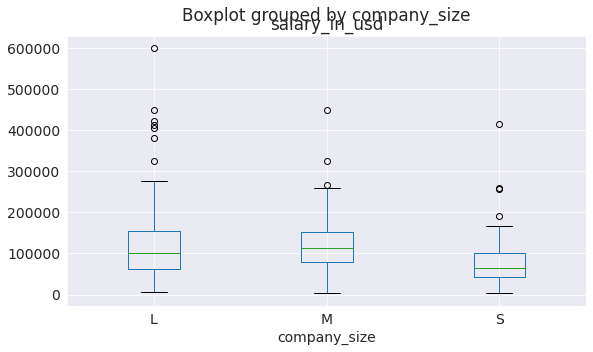

In [38]:
salary_df.boxplot(column='salary_in_usd', by='company_size')

From the above diagram; there is a correlation between the size of the company and the salary. As a significant number of individuals receiving huge amounts of money are employed in large companies.

In [39]:
# Questions to consider
In which country do the job holders receive large amounts of salary?
Which country has the largest number of data science related job holders?


Object `salary` not found.
Object `holders` not found.


Let us save and upload our work to Jovian before continuing.

In [40]:
import jovian

In [41]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "moseskinuthia73/datascience-jobs-salaries" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/moseskinuthia73/datascience-jobs-salaries


'https://jovian.ai/moseskinuthia73/datascience-jobs-salaries'

## Inferences and Conclusion

From our analysis, it is evident that the more senior a position is in a company, the higher the amount of salary it receives.
From our dataset, most of the companies are located in the US. It can be deduced that the United States has made significant investments in technology, as evidenced by the salaries that US-based companies pay their employees.
In conclusion, it can be said that there is a great potential for growth in the tech industry (US) as more and more companies are recruiting individuals in tech-related roles, especially in data science.

In [42]:
import jovian

In [43]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "moseskinuthia73/datascience-jobs-salaries" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/moseskinuthia73/datascience-jobs-salaries


'https://jovian.ai/moseskinuthia73/datascience-jobs-salaries'